In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'fixed/data/'

/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
df=pd.read_pickle('df_fixed.pkl')

In [5]:
df.head(20)

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,PHE,1,1,-17.932,5.235,4.057,0.0,N,-19.289,5.514,3.562
1,2,CA,PHE,1,1,-19.289,5.514,3.562,0.0,C,-19.289,5.514,3.562
2,3,C,PHE,1,1,-19.342,6.462,2.300,0.0,C,-19.289,5.514,3.562
3,4,O,PHE,1,1,-19.767,6.029,1.234,0.0,O,-19.289,5.514,3.562
4,5,CB,PHE,1,1,-20.099,6.097,4.709,0.0,C,-19.289,5.514,3.562
5,6,CG,PHE,1,1,-21.559,6.092,4.496,0.0,C,-19.289,5.514,3.562
6,7,CD1,PHE,1,1,-22.286,4.925,4.670,0.0,C,-19.289,5.514,3.562
7,8,CD2,PHE,1,1,-22.231,7.244,4.111,0.0,C,-19.289,5.514,3.562
8,9,CE1,PHE,1,1,-23.668,4.909,4.479,0.0,C,-19.289,5.514,3.562
9,10,CE2,PHE,1,1,-23.625,7.231,3.923,0.0,C,-19.289,5.514,3.562


In [6]:
df.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [7]:
cat_vars = ['atom_name', 'residue_name', 'chain_id',
       'residue_number','element_symbol']

In [8]:
contin_vars = ['x_coord', 'y_coord', 'z_coord','x_ca', 'y_ca', 'z_ca']

In [9]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [10]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [11]:
df.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [12]:
y=df.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number','element_symbol', 'x_ca', 'y_ca', 'z_ca'],axis=1)
y.head()

,x_coord,y_coord,z_coord
0,-17.931999,5.235,4.057
1,-19.289000,5.514,3.562
2,-19.341999,6.462,2.300
3,-19.767000,6.029,1.234
4,-20.099001,6.097,4.709


In [13]:
y=y.values

In [14]:
train_cats(df)

In [15]:
df.head()

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,PHE,1,1,-17.931999,5.235,4.057,0.0,N,-19.289,5.514,3.562
1,2,CA,PHE,1,1,-19.289000,5.514,3.562,0.0,C,-19.289,5.514,3.562
2,3,C,PHE,1,1,-19.341999,6.462,2.300,0.0,C,-19.289,5.514,3.562
3,4,O,PHE,1,1,-19.767000,6.029,1.234,0.0,O,-19.289,5.514,3.562
4,5,CB,PHE,1,1,-20.099001,6.097,4.709,0.0,C,-19.289,5.514,3.562


In [16]:
df=df.drop(['x_coord','y_coord', 'z_coord'],axis=1)
df.head(10)

,atom_number,atom_name,residue_name,chain_id,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,PHE,1,1,0.0,N,-19.289,5.514,3.562
1,2,CA,PHE,1,1,0.0,C,-19.289,5.514,3.562
2,3,C,PHE,1,1,0.0,C,-19.289,5.514,3.562
3,4,O,PHE,1,1,0.0,O,-19.289,5.514,3.562
4,5,CB,PHE,1,1,0.0,C,-19.289,5.514,3.562
5,6,CG,PHE,1,1,0.0,C,-19.289,5.514,3.562
6,7,CD1,PHE,1,1,0.0,C,-19.289,5.514,3.562
7,8,CD2,PHE,1,1,0.0,C,-19.289,5.514,3.562
8,9,CE1,PHE,1,1,0.0,C,-19.289,5.514,3.562
9,10,CE2,PHE,1,1,0.0,C,-19.289,5.514,3.562


In [17]:
df=df.drop(['atom_number'],axis=1)
df.head()

,atom_name,residue_name,chain_id,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,N,PHE,1,1,0.0,N,-19.289,5.514,3.562
1,CA,PHE,1,1,0.0,C,-19.289,5.514,3.562
2,C,PHE,1,1,0.0,C,-19.289,5.514,3.562
3,O,PHE,1,1,0.0,O,-19.289,5.514,3.562
4,CB,PHE,1,1,0.0,C,-19.289,5.514,3.562


In [18]:
df1, d, nas, mapper = proc_df(df, 'b_factor', do_scale=True)

In [19]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(len(df1) * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [20]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, y.astype(np.float32), cat_flds=cat_vars, bs=64)

In [21]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [22]:
cat_sz

[('atom_name', 83),
 ('residue_name', 21),
 ('chain_id', 275),
 ('residue_number', 596),
 ('element_symbol', 6)]

In [23]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [24]:
emb_szs

[(83, 42), (21, 11), (275, 50), (596, 50), (6, 3)]

In [32]:
m = md.get_learner(emb_szs, 3,0.01, 3, [1000,500], [0.04,0.06])

In [33]:
m.crit = F.mse_loss

In [30]:
m.lr_find()

 53%|█████▎    | 2166/4102 [00:08<00:07, 244.11it/s, loss=37.3]   


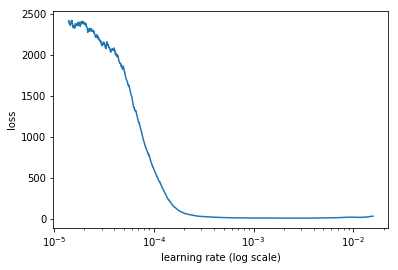

In [31]:
m.sched.plot(100)

In [43]:
lr = 1e-4

In [44]:
m.fit(lr, 10,cycle_len=4)

[0.      2.80209 4.78323]                                      
[1.      2.81827 4.92629]                                      
[2.      2.70417 4.8307 ]                                      
[3.      2.85397 4.83308]                                      
[4.      2.77982 4.95818]                                      
[5.      2.83741 4.60982]                                      
[6.      2.79795 4.81265]                                      
[7.      2.71981 4.85364]                                      
[8.      2.85867 4.5346 ]                                      
[9.      2.88399 4.7294 ]                                      
[10.       2.91307  4.80998]                                   
[11.       2.78964  4.79932]                                   
[12.       2.81986  4.929  ]                                   
[13.       2.91119  4.89432]                                   
[14.       2.7688   4.82998]                                   
[15.       2.75878  4.8749 ]            

In [27]:
m.load('m_fixed')

In [31]:
e = m.model
e.eval()

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(83, 42)
    (1): Embedding(21, 11)
    (2): Embedding(275, 50)
    (3): Embedding(596, 50)
    (4): Embedding(6, 3)
  )
  (lins): ModuleList(
    (0): Linear(in_features=159, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=800, bias=True)
    (2): Linear(in_features=800, out_features=700, bias=True)
    (3): Linear(in_features=700, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True)
    (2): BatchNorm1d(700, eps=1e-05, momentum=0.1, affine=True)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=3, bias=True)
  (emb_drop): Dropout(p=0.01)
  (drops): ModuleList(
    (0): Dropout(p=0.04)
    (1): Dropout(p=0.06)
  )
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True)
)

In [46]:
x,y = m.predict_with_targs()

In [35]:
x

array([[ 0.57656, 56.09896, 13.00698],
       [-0.99156, 54.77145, 16.83237],
       [-1.09123, 54.6034 , 16.94398],
       [-1.11748, 54.47924, 16.85531],
       [-1.16777, 54.39265, 16.85857],
       [-1.39903, 54.91517, 17.27634],
       [-1.49155, 54.739  , 17.09087],
       [-1.40713, 54.97038, 17.12546],
       [-1.60577, 54.56369, 17.7487 ],
       [-4.42525, 55.82359, 16.8571 ],
       [-4.14641, 55.63922, 16.74544],
       [-4.35008, 55.57195, 16.9621 ],
       [-4.42685, 55.38552, 16.96252],
       [-3.62933, 55.77427, 16.41069],
       [-3.28657, 55.80767, 16.12182],
       [-4.78254, 55.00225, 13.64324],
       [-4.97395, 54.99959, 13.76885],
       [-4.75663, 54.85994, 13.59474],
       [-4.77089, 54.83274, 13.54475],
       [-5.84249, 55.36082, 13.74052],
       ...,
       [18.45296, 46.44049, 11.30644],
       [18.47353, 45.90326,  8.09696],
       [18.48729, 46.03172,  8.15175],
       [18.66112, 45.94619,  8.00625],
       [18.78268, 45.983  ,  7.94058],
       [18.16

In [36]:
y

array([[[ 1.505, 52.509, 11.946]],

       [[-0.487, 54.913, 15.636]],

       [[-1.276, 54.112, 16.54 ]],

       [[-2.77 , 54.431, 16.48 ]],

       [[-3.578, 53.549, 16.254]],

       [[-0.747, 54.257, 17.965]],

       [[ 0.694, 53.713, 18.053]],

       [[-1.637, 53.506, 18.939]],

       [[ 1.37 , 54.021, 19.414]],

       [[-3.145, 55.684, 16.664]],

       [[-4.551, 56.015, 16.755]],

       [[-5.269, 55.719, 15.456]],

       [[-6.406, 55.28 , 15.467]],

       [[-4.75 , 57.478, 17.199]],

       [[-4.184, 58.394, 16.263]],

       [[-4.597, 55.913, 14.329]],

       [[-5.248, 55.665, 13.041]],

       [[-5.52 , 54.184, 12.889]],

       [[-6.601, 53.783, 12.455]],

       [[-4.413, 56.19 , 11.862]],

       ...,

       [[12.416, 44.046, 12.435]],

       [[18.737, 45.469,  9.754]],

       [[18.699, 45.995,  8.389]],

       [[19.849, 45.449,  7.539]],

       [[19.645, 45.076,  6.37 ]],

       [[18.709, 47.533,  8.412]],

       [[21.044, 45.381,  8.123]],

       [[22.212